In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:\\Users\computer\Country-data.csv")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
105,Morocco,33.5,32.20,5.20,43.0,6440,0.976,73.5,2.58,2830
75,Italy,4.0,25.20,9.53,27.2,36200,0.319,81.7,1.46,35800
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(167, 10)

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


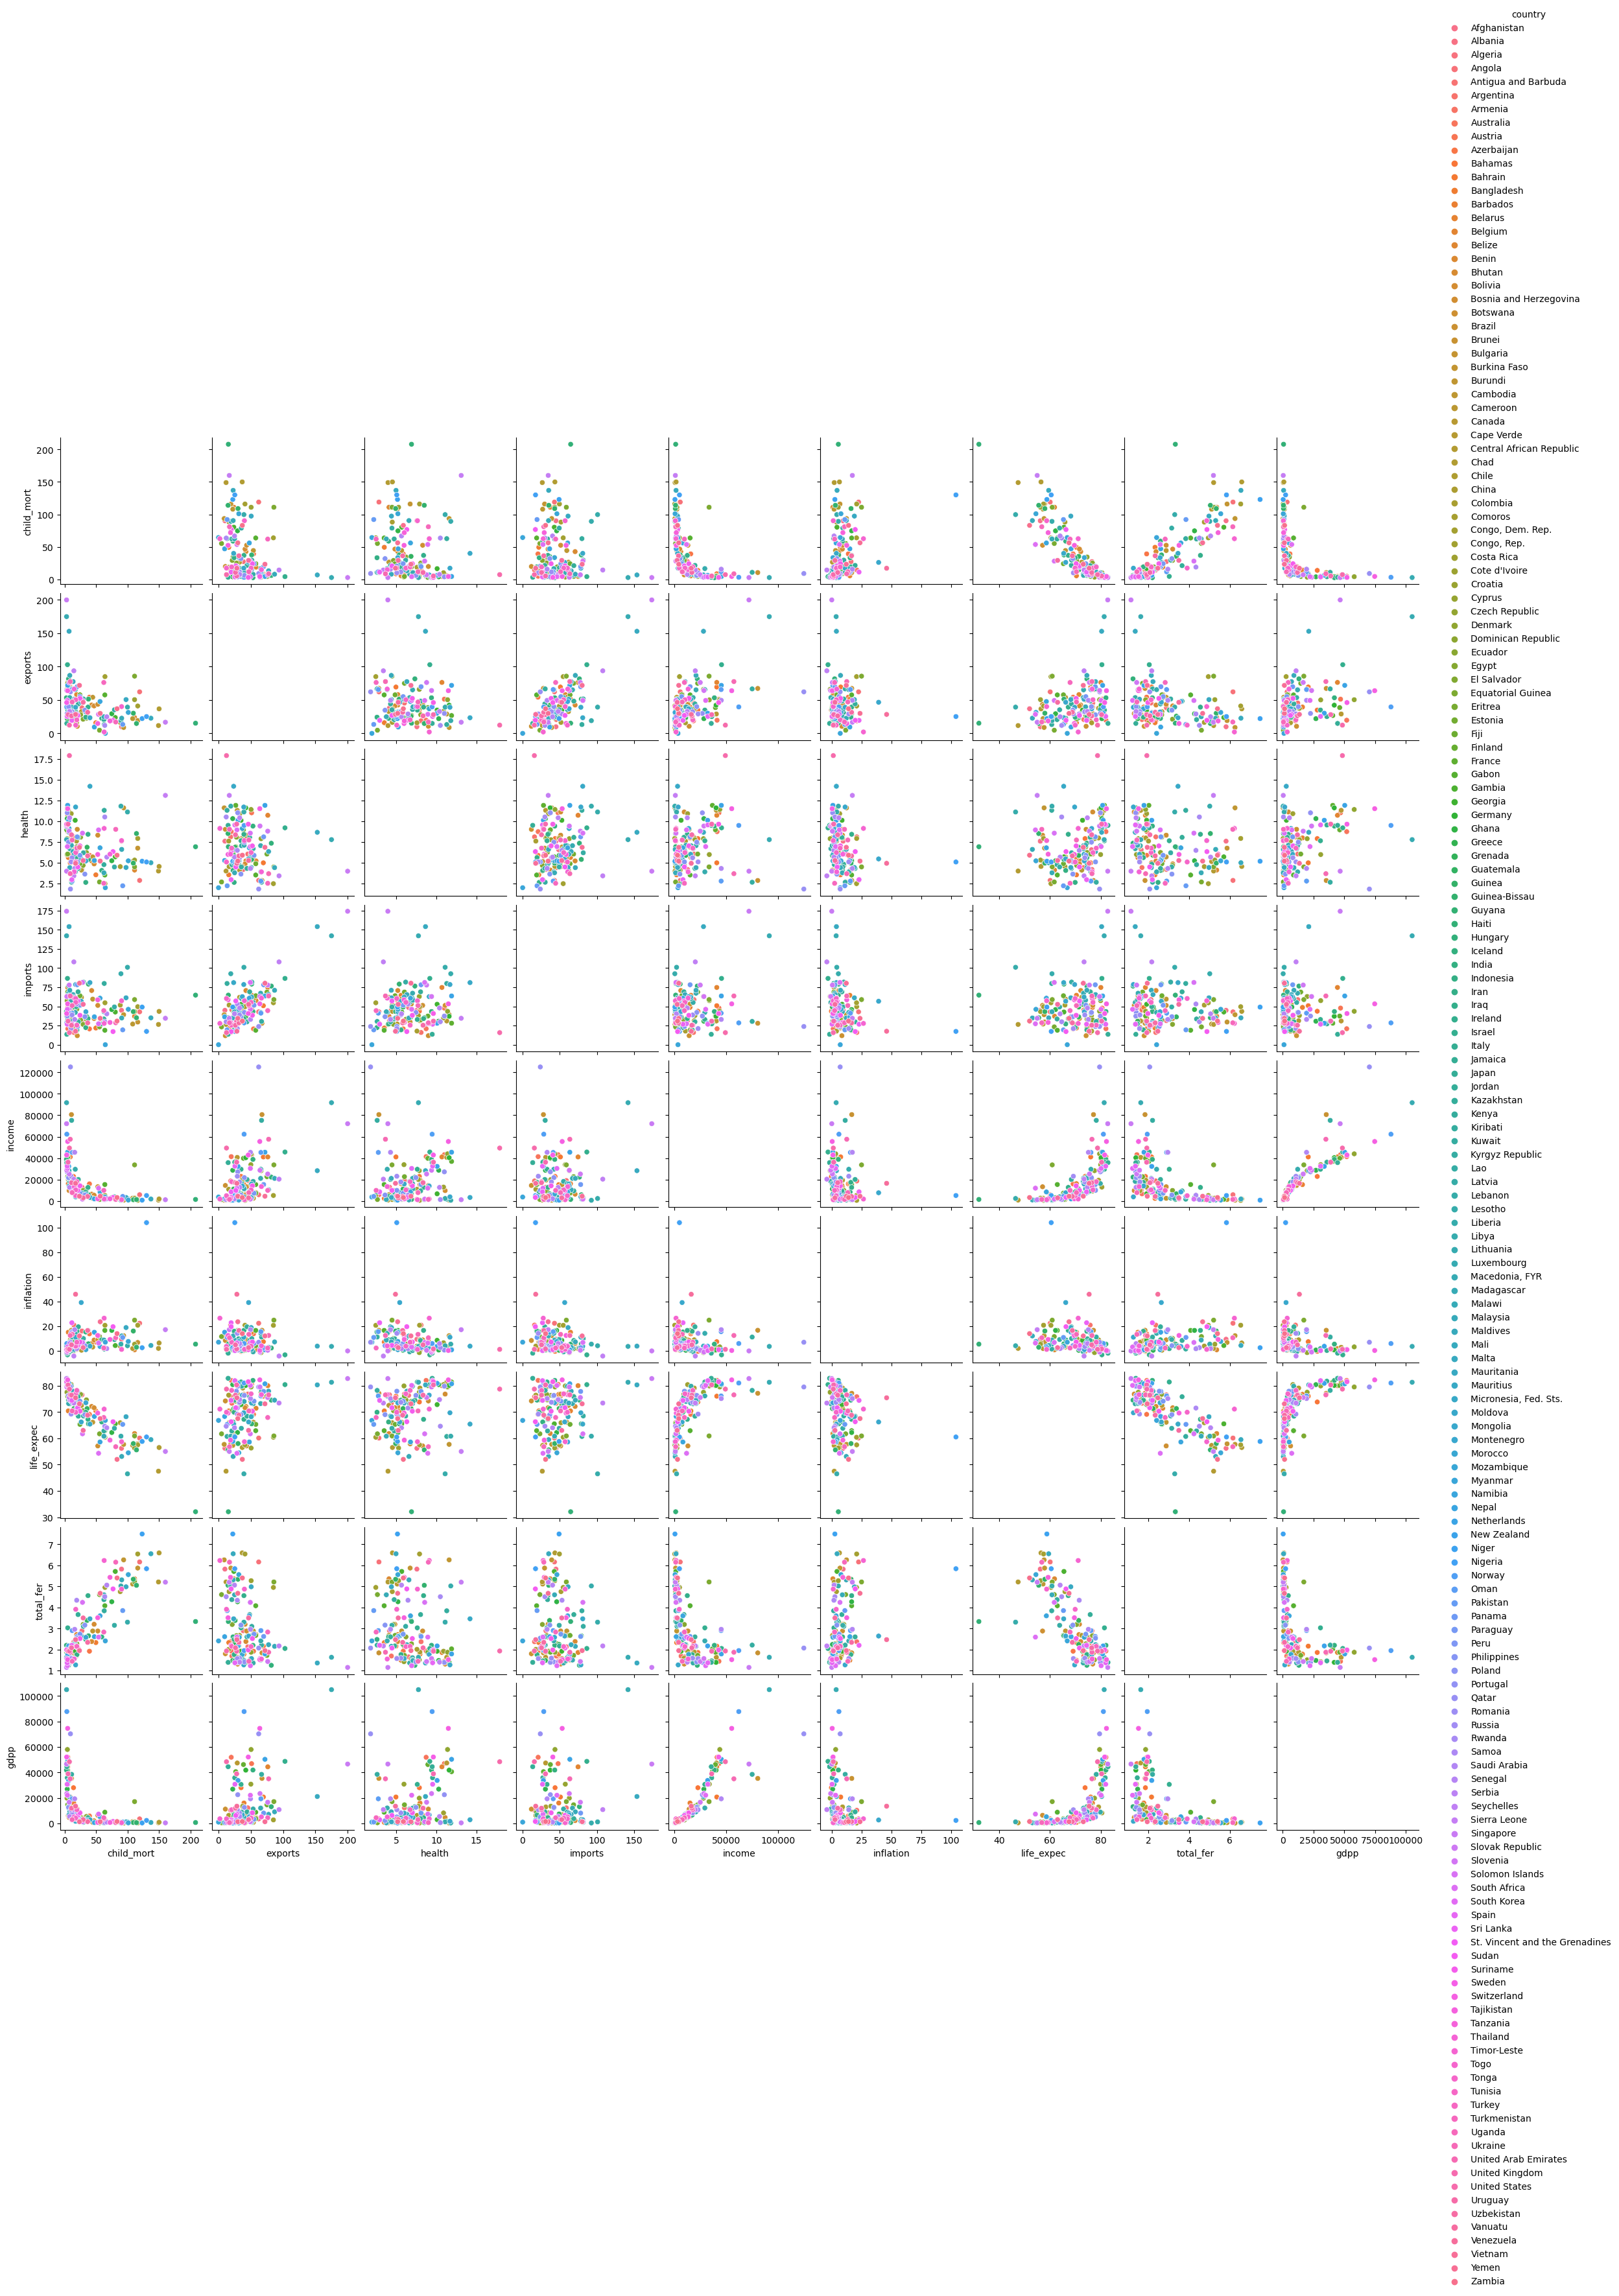

In [10]:
X=df.iloc[:,1:].values
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,-2:]=imputer.fit_transform(X[:,-2:])

sns.pairplot(df, hue='country', height=2.5)
    

In [11]:

mds=MDS(n_components=6)
X=mds.fit_transform(X)


scaler=StandardScaler()
X=scaler.fit_transform(X)

C:\PerfLogs\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


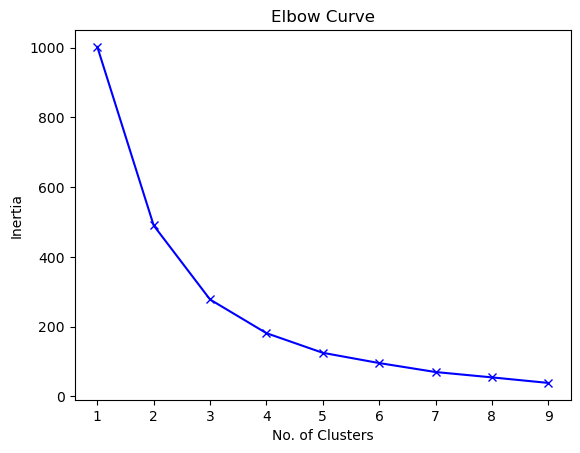

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Silhouette Score for K Means clustering:  0.6927765015893129


In [12]:
inertia=[]
list_clusters=list(range(1,10))
for k in list_clusters:
  km=KMeans(n_clusters=k)
  km.fit(X)
  inertia.append(km.inertia_)
plt.plot(list_clusters,inertia,'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#Here, elbow occurs at k=2. So, K Means algorithm is used with 2 clusters.
kmns=KMeans(n_clusters=2, init='k-means++')
kmns.fit(X)
labels=kmns.labels_
print(labels)

#Calculation of Accuracy using silhouettte score
score=silhouette_score(X,labels)
print("Silhouette Score for K Means clustering: ",score)

In [13]:
#Hierarchical Agglomerative Clustering
agg=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit(X)
agg_labels=agg.labels_
print(labels)

#Accuracy Calculation using silhouette score
agg_score=silhouette_score(X,agg_labels)
print("Silhouette Score for Hierarchical Agglomerative Clustering: ",agg_score)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Silhouette Score for Hierarchical Agglomerative Clustering:  0.665807485754651


In [14]:
#Spectral Clustering
spectral=SpectralClustering(n_clusters=2)
sp_labels=spectral.fit_predict(X)
print(sp_labels)

#Accuracy calculation using Silhouette Score
sp_score=silhouette_score(X,sp_labels)
print("Silhouette Score for Spectral Clustering: ",sp_score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette Score for Spectral Clustering:  0.8595056693902546


In [15]:

str_labels=labels.astype(str)
str_labels=np.where(str_labels=='0','Priority','Non-Priority')

df['Aid_Level']=str_labels
print(df.head)
df.to_csv('Output.csv', index=False)

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp Aid_Level  
0         9.44        56

In [16]:

unique_elements,counts=np.unique(str_labels,return_counts=True)
for ele,count in zip(unique_elements,counts):
  print(f"There are {count} countries of aid level {ele}.")

num=df.iloc[:,1:9]
m1=MDS(n_components=6)
num=m1.fit_transform(num)
imp_cols=pd.DataFrame(num, columns=['MDS1', 'MDS2','MDS3','MDS4','MDS5','MDS6'])
print(imp_cols)

There are 32 countries of aid level Non-Priority.
There are 135 countries of aid level Priority.
            MDS1         MDS2         MDS3         MDS4         MDS5  \
0   -3116.829031  5239.608388 -9094.212021  5122.799020 -8332.763189   
1   -1051.724712  2189.307679 -4374.382027  2237.069417 -4209.127318   
2    -400.109874  1149.969007 -2671.339632  1194.672972 -2717.221656   
3   -2014.769911  3662.983526 -6738.498953  3632.174182 -6172.360804   
4     873.247826  -884.066145   920.339115  -844.313116   581.411420   
..           ...          ...          ...          ...          ...   
162 -2752.041268  4758.886998 -8346.282142  4710.278478 -7649.773760   
163   362.122222   -43.045481  -613.971741   -73.602674  -818.142700   
164 -2387.518704  4172.490136 -7504.380110  4073.883383 -6890.050961   
165 -2367.939457  4190.588069 -7475.808561  4106.295445 -6926.309993   
166 -2655.764780  4633.913992 -8166.844014  4585.175245 -7472.712321   

            MDS6  
0    4941.423766  


In [33]:
df1 = pd.DataFrame()
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(df['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


In [81]:
df2 = df.copy(deep = True)

col = list(df.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

In [101]:
for i in col:
     df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
    df2.head()

IndentationError: unexpected indent (3227607176.py, line 4)

In [103]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

ValueError: could not convert string to float: 'Afghanistan'

In [102]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'